<a href="https://colab.research.google.com/github/Wanderer0074348/CustomerSegementationUsingAI/blob/main/Clustering_Techniques_On_New_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv("data2.csv")
df.describe()

,CustomerID,R score,F score,M score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,13007.00400,3.657000,1.557000,1.564000
std,396.24648,1.145715,0.814503,0.593512
min,12347.00000,1.000000,1.000000,1.000000
25%,12652.75000,3.000000,1.000000,1.000000
50%,13001.50000,4.000000,1.000000,2.000000
75%,13349.25000,5.000000,2.000000,2.000000
max,13707.00000,5.000000,5.000000,5.000000


In [3]:
features = ["R score","F score","M score"]
RFM = df[features]

In [4]:
from sklearn.cluster import KMeans

In [5]:
cluster_range = range(2,11)
inertia_values = []

In [6]:
for i in cluster_range:
  kmeans = KMeans(n_clusters = i, random_state = 42)
  kmeans.fit(RFM)
  inertia_values.append(kmeans.inertia_)

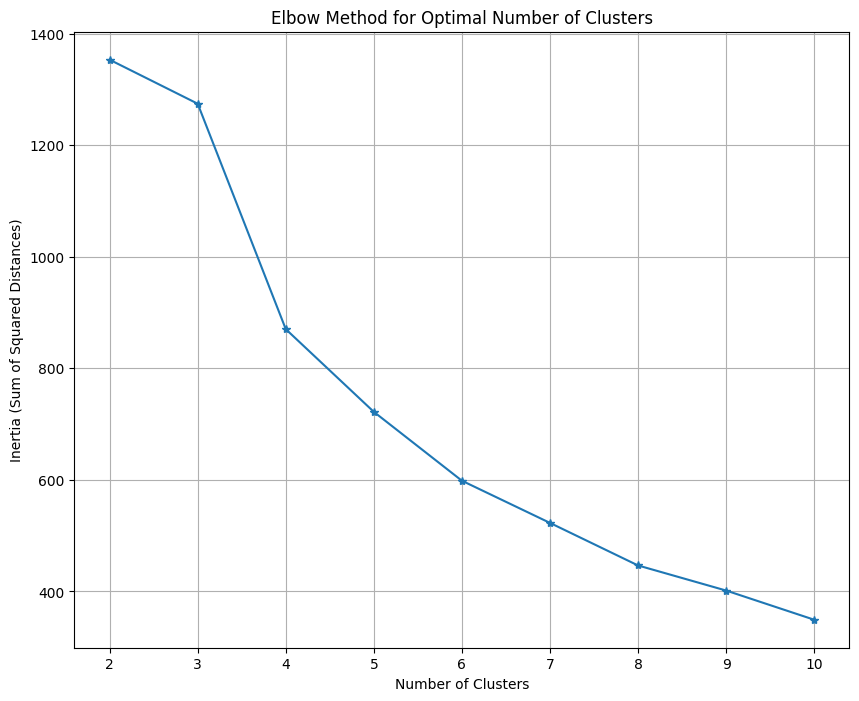

In [7]:
plt.figure(figsize = (10,8))
plt.plot(cluster_range,inertia_values,marker="*")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [8]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

In [9]:
def silhouette_plot(X,n_clusters):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.3f}")

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"Silhouette plot for {n_clusters} clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([i/10 for i in range(-1, 11)])

    plt.show()

For n_clusters = 3, the average silhouette score is 0.392


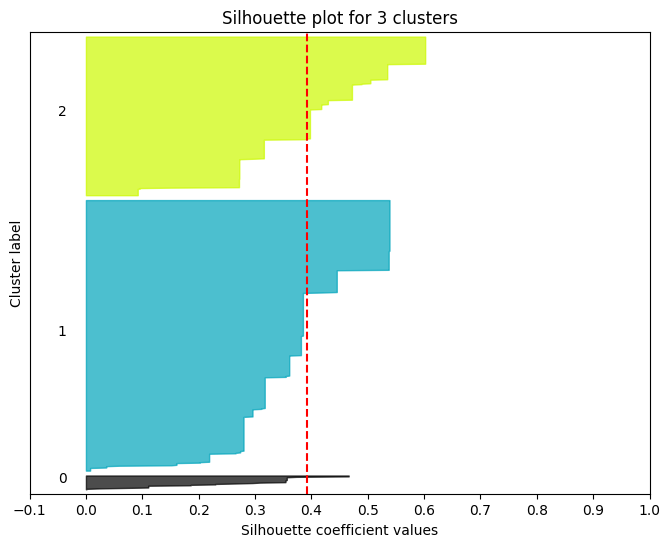

For n_clusters = 4, the average silhouette score is 0.446


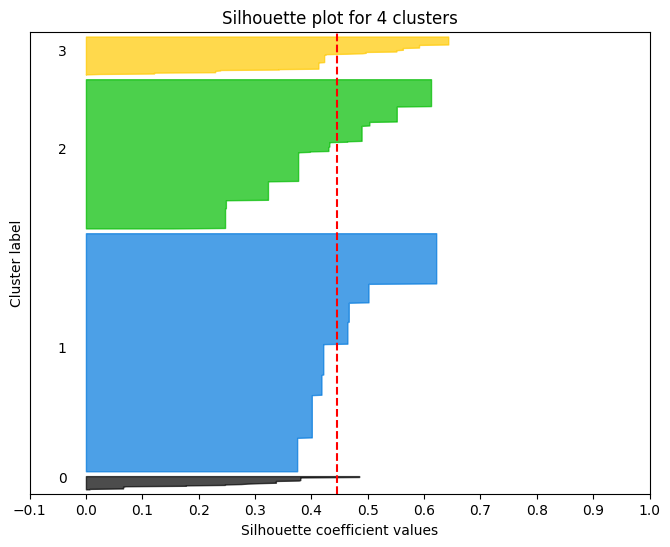

For n_clusters = 5, the average silhouette score is 0.372


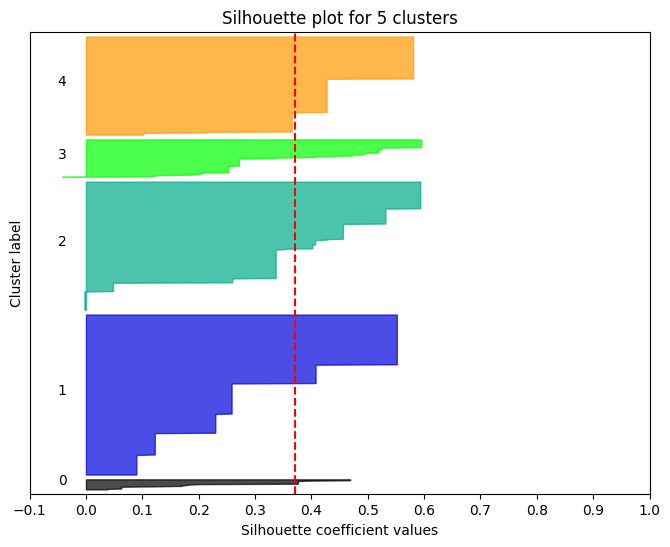

For n_clusters = 6, the average silhouette score is 0.383


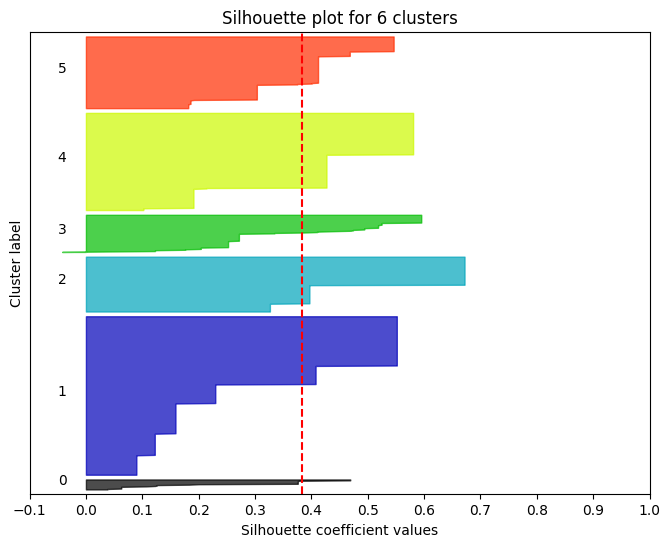

For n_clusters = 7, the average silhouette score is 0.408


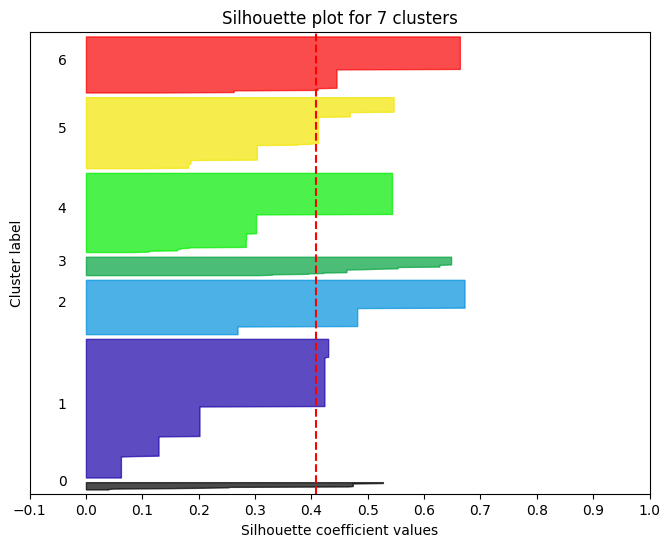

In [10]:
for clusters in [3,4,5,6,7]:
  silhouette_plot(RFM,clusters)

In [11]:
cluster_size = 5

In [12]:
X = df[['R score', 'F score', 'M score']]

kmeans = KMeans(n_clusters=cluster_size, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

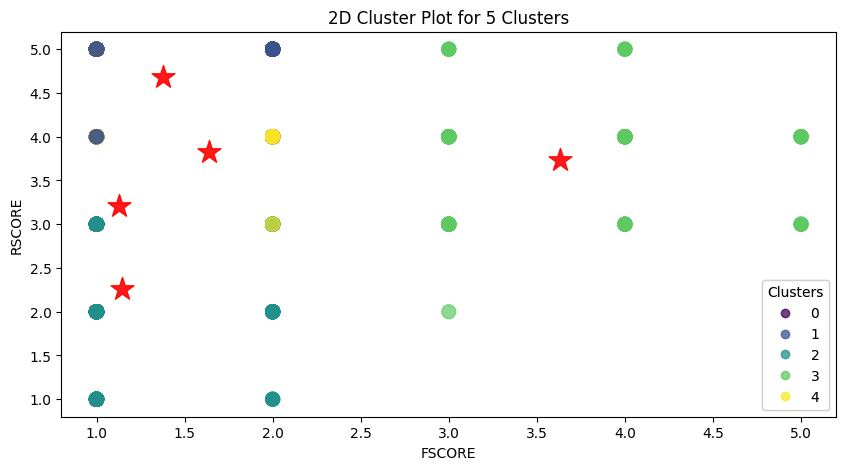

In [13]:
plt.figure(figsize=(10, 5))
scatter = plt.scatter(df['F score'], df['R score'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=300, alpha=0.9, marker='*', label='Centroids')

plt.xlabel('FSCORE')
plt.ylabel('RSCORE')
plt.title(f'2D Cluster Plot for {cluster_size} Clusters')

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

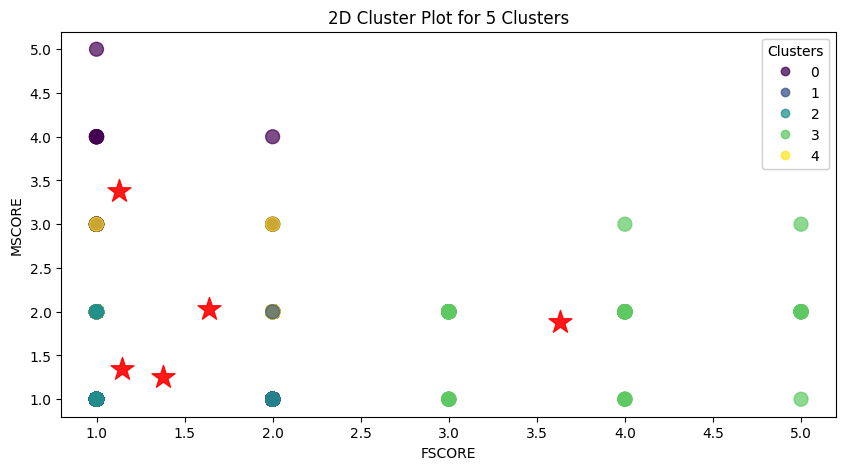

In [14]:
plt.figure(figsize=(10, 5))
scatter = plt.scatter(df['F score'], df['M score'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 2], c='red', s=300, alpha=0.9, marker='*', label='Centroids')

plt.xlabel('FSCORE')
plt.ylabel('MSCORE')
plt.title(f'2D Cluster Plot for {cluster_size} Clusters')

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

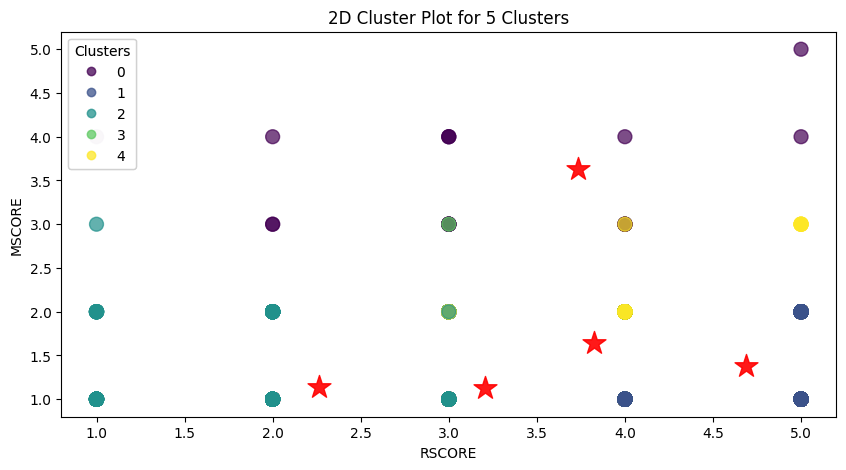

In [15]:
plt.figure(figsize=(10, 5))
scatter = plt.scatter(df['R score'], df['M score'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, alpha=0.9, marker='*', label='Centroids')

plt.xlabel('RSCORE')
plt.ylabel('MSCORE')
plt.title(f'2D Cluster Plot for {cluster_size} Clusters')

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

In [16]:
jitter_strength = 0.1
df['F score jitter'] = df['F score'] + np.random.normal(0, jitter_strength, size=len(df))
df['R score jitter'] = df['R score'] + np.random.normal(0, jitter_strength, size=len(df))
df['M score jitter'] = df['M score'] + np.random.normal(0, jitter_strength, size=len(df))

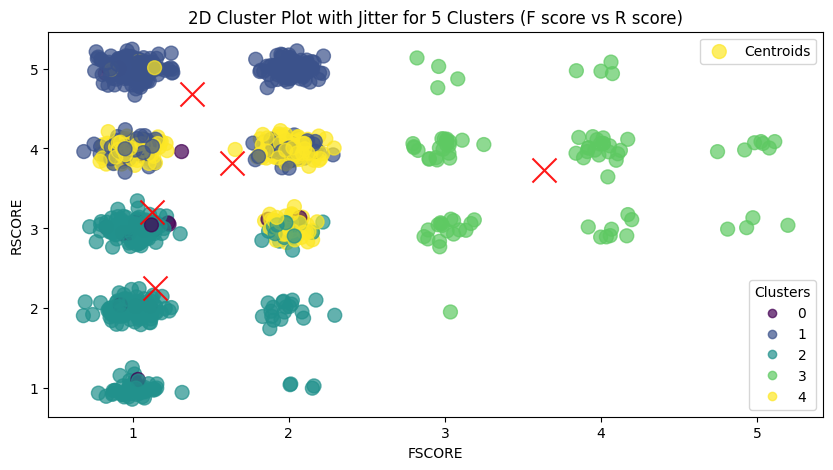

In [17]:
plt.figure(figsize=(10, 5))
scatter = plt.scatter(df['F score jitter'], df['R score jitter'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=300, alpha=0.9, marker='x', label='Centroids')

plt.xlabel('FSCORE')
plt.ylabel('RSCORE')
plt.title(f'2D Cluster Plot with Jitter for {cluster_size} Clusters (F score vs R score)')

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.legend(['Centroids'], loc='upper right')
plt.show()

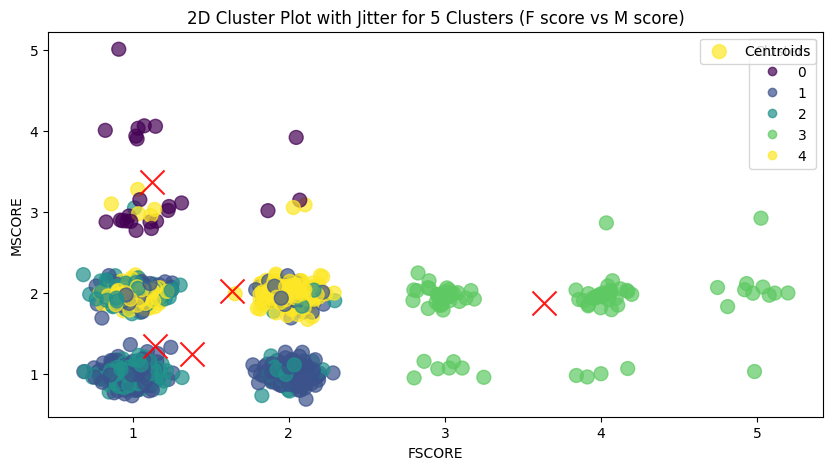

In [18]:
plt.figure(figsize=(10, 5))
scatter = plt.scatter(df['F score jitter'], df['M score jitter'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 2], c='red', s=300, alpha=0.9, marker='x', label='Centroids')

plt.xlabel('FSCORE')
plt.ylabel('MSCORE')
plt.title(f'2D Cluster Plot with Jitter for {cluster_size} Clusters (F score vs M score)')

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.legend(['Centroids'], loc='upper right')
plt.show()

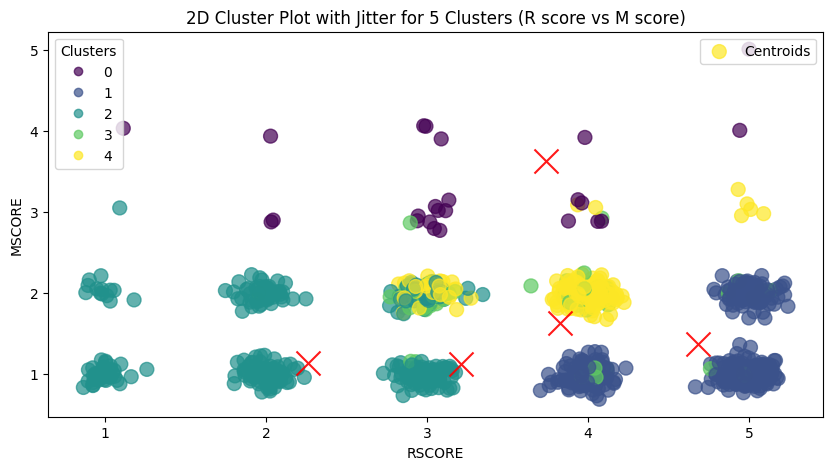

In [19]:
plt.figure(figsize=(10, 5))
scatter = plt.scatter(df['R score jitter'], df['M score jitter'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, alpha=0.9, marker='x', label='Centroids')

plt.xlabel('RSCORE')
plt.ylabel('MSCORE')
plt.title(f'2D Cluster Plot with Jitter for {cluster_size} Clusters (R score vs M score)')

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.legend(['Centroids'], loc='upper right')
plt.show()

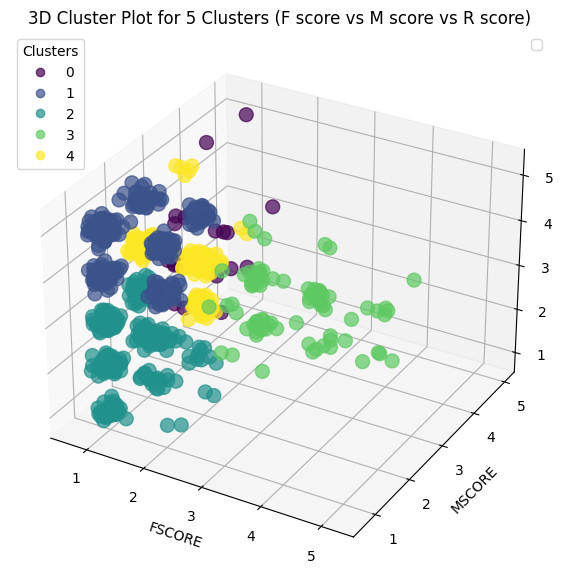

In [20]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['F score jitter'], df['M score jitter'], df['R score jitter'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)

ax.set_xlabel('FSCORE')
ax.set_ylabel('MSCORE')
ax.set_zlabel('RSCORE')
plt.title(f'3D Cluster Plot for {cluster_size} Clusters (F score vs M score vs R score)')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters", loc='upper left')
ax.add_artist(legend1)

plt.legend(loc='upper right')

plt.show()